In [39]:
# performing linear algebra 
import numpy as np 

# data processing 
import pandas as pd 

# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [40]:
df = pd.read_csv("data.csv") 

print (df.head) 


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [41]:
# Drop unnecessary columns
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(axis=0, inplace=True)

# Check the shape of the DataFrame after preprocessing
print(df.shape)
print(df.head())

(569, 31)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38      

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [43]:
# Encode the 'diagnosis' column
def diagnosis_value(diagnosis): 
    return 1 if diagnosis == 'M' else 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

# Prepare features and target variable
X = np.array(df.drop(columns=['diagnosis']))
y = np.array(df['diagnosis'])

# Check the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


Features shape: (569, 30)
Target shape: (569,)


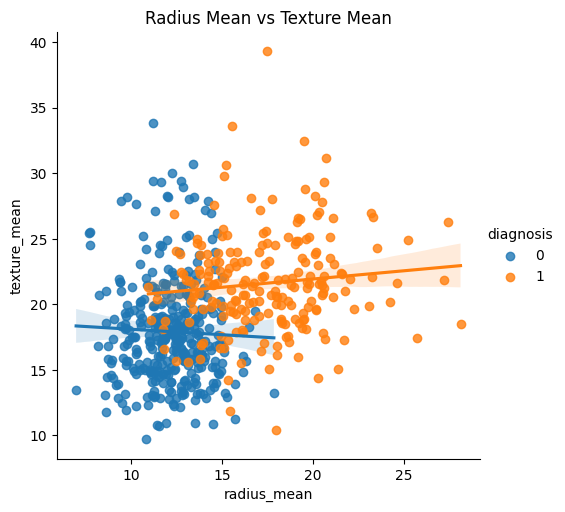

In [44]:
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Radius Mean vs Texture Mean')
plt.show()

In [45]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [46]:
knn.score(X_test, y_test) 
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[119   2]
 [  5  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.97      0.93      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



In [47]:
neighbors = [] 
cv_scores = [] 

# Perform 10-fold cross-validation
for k in range(1, 51, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(
        knn, X_train, y_train, cv=10, scoring='accuracy'
    ) 
    cv_scores.append(scores.mean())

The optimal number of neighbors is 13


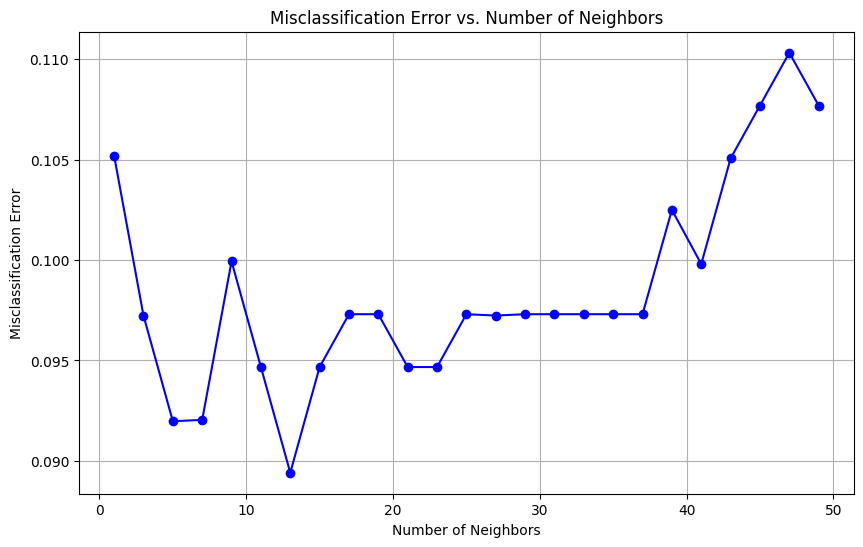

In [48]:
MSE = [1 - x for x in cv_scores] 

# Determine the optimal k
optimal_k = neighbors[MSE.index(min(MSE))] 
print(f'The optimal number of neighbors is {optimal_k}')

# Plot misclassification error versus k
plt.figure(figsize=(10, 6)) 
plt.plot(neighbors, MSE, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Neighbors')
plt.grid(True)
plt.show()